In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
pmd_genres = pd.read_csv("")
pmd_genres

,Playlist,Track ID,Artist,Track name,reducedGenre
0,DOMINANT-01,42bbDWZ8WmXTH7PkYAlGLu,George Ezra,Hold My Girl,Pop
1,DOMINANT-01,3osydJRsRqgVFKYTC04QfT,Jux,Enjoy,World/Traditional
2,DOMINANT-01,6RdkggWArMBHrxBmKTvsaj,Zuchu,Kwikwi,Pop
3,DOMINANT-01,1guLggb4orDoc7Dmh2cSuL,Hannah Mae,Waterdicht,Pop
4,DOMINANT-01,4nHJcUtNSUVjXRnjdP29Bk,Noah Kahan,You’re Gonna Go Far,Pop
...,...,...,...,...,...
1868,MOSART-84,2exyJyZmQAyLKuxEy4IVPh,Ran-D,Living For The Moment,Electronic
1869,MOSART-84,1elGwF4VwkwglV4nCBPJtv,Hans Zimmer,Now We Are Free,Easy listening
1870,MOSART-84,7LVHVU3tWfcxj5aiPFEW4Q,Coldplay,Fix You,Pop
1871,MOSART-84,3AJwUDP919kvQ9QcozQPxg,Coldplay,Yellow,Pop


In [8]:
# Total number of tracks in the dataset
total_tracks = pmd_genres.shape[0]
print(f"Total number of tracks in PMD: {total_tracks}")

# Genre composition and diversity score using entropy
def calculate_entropy(df):
    genre_counts = df['reducedGenre'].dropna().str.split(', ').explode().value_counts()
    proportions = genre_counts / genre_counts.sum()
    proportions = proportions[proportions > 0]  # Filter out zero proportions
    return -np.sum(proportions * np.log2(proportions))

entropy_score = calculate_entropy(pmd_genres)
print(f"Genre diversity score (entropy): {entropy_score:.4f}")

# Mean, standard deviation, and range of the number of tracks submitted by each participant
tracks_per_participant = pmd_genres.groupby("Playlist").size()
mean_tracks_per_participant = tracks_per_participant.mean()
std_dev_tracks_per_participant = tracks_per_participant.std()
min_tracks_per_participant = tracks_per_participant.min()
max_tracks_per_participant = tracks_per_participant.max()

print(f"Mean number of tracks submitted per participant: {mean_tracks_per_participant:.2f}")
print(f"Standard deviation of tracks submitted per participant: {std_dev_tracks_per_participant:.2f}")
print(f"Range of tracks submitted per participant: {min_tracks_per_participant} to {max_tracks_per_participant}")

Total number of tracks in PMD: 1873
Genre diversity score (entropy): 3.0609
Mean number of tracks submitted per participant: 11.42
Standard deviation of tracks submitted per participant: 5.07
Range of tracks submitted per participant: 2 to 60


In [9]:
# Subgroup analysis: MOSART and DOMINANT
for playlist_type in ['MOSART', 'DOMINANT']:
    subset_df = pmd_genres[pmd_genres['Playlist'].str.contains(playlist_type, na=False)]
    subset_tracks = subset_df.shape[0]
    subset_entropy = calculate_entropy(subset_df)
    
    print(f"{playlist_type} analysis:")
    print(f"Total tracks: {subset_tracks}")
    print(f"Genre diversity (entropy score): {subset_entropy:.4f}")

MOSART analysis:
Total tracks: 999
Genre diversity (entropy score): 3.0824
DOMINANT analysis:
Total tracks: 874
Genre diversity (entropy score): 2.9323


In [10]:
# Function to calculate genre proportions
def calculate_genre_proportions(df):
    genre_counts = df['reducedGenre'].value_counts()
    total_tracks = len(df)
    genre_proportions = (genre_counts / total_tracks) * 100  # Convert to percentage
    # Create a DataFrame with results
    genre_proportion_df = pd.DataFrame({
        'Genre': genre_proportions.index,
        'Proportion (%)': genre_proportions.values,
        'Track count': genre_counts.values
    }).sort_values(by='Proportion (%)', ascending=False)

    return genre_proportion_df

# Calculate overall genre proportions
overall_genre_proportions = calculate_genre_proportions(pmd_genres)
overall_genre_proportions

,Genre,Proportion (%),Track count
0,Pop,34.970635,655
1,Rock,18.152696,340
2,Electronic,8.756006,164
3,Hip Hop,6.673785,125
4,R&B,6.193273,116
5,Classical,5.872931,110
6,Folk/Acoustic,4.111052,77
7,Easy listening,3.203417,60
8,Metal,2.936466,55
9,Latin,2.616124,49


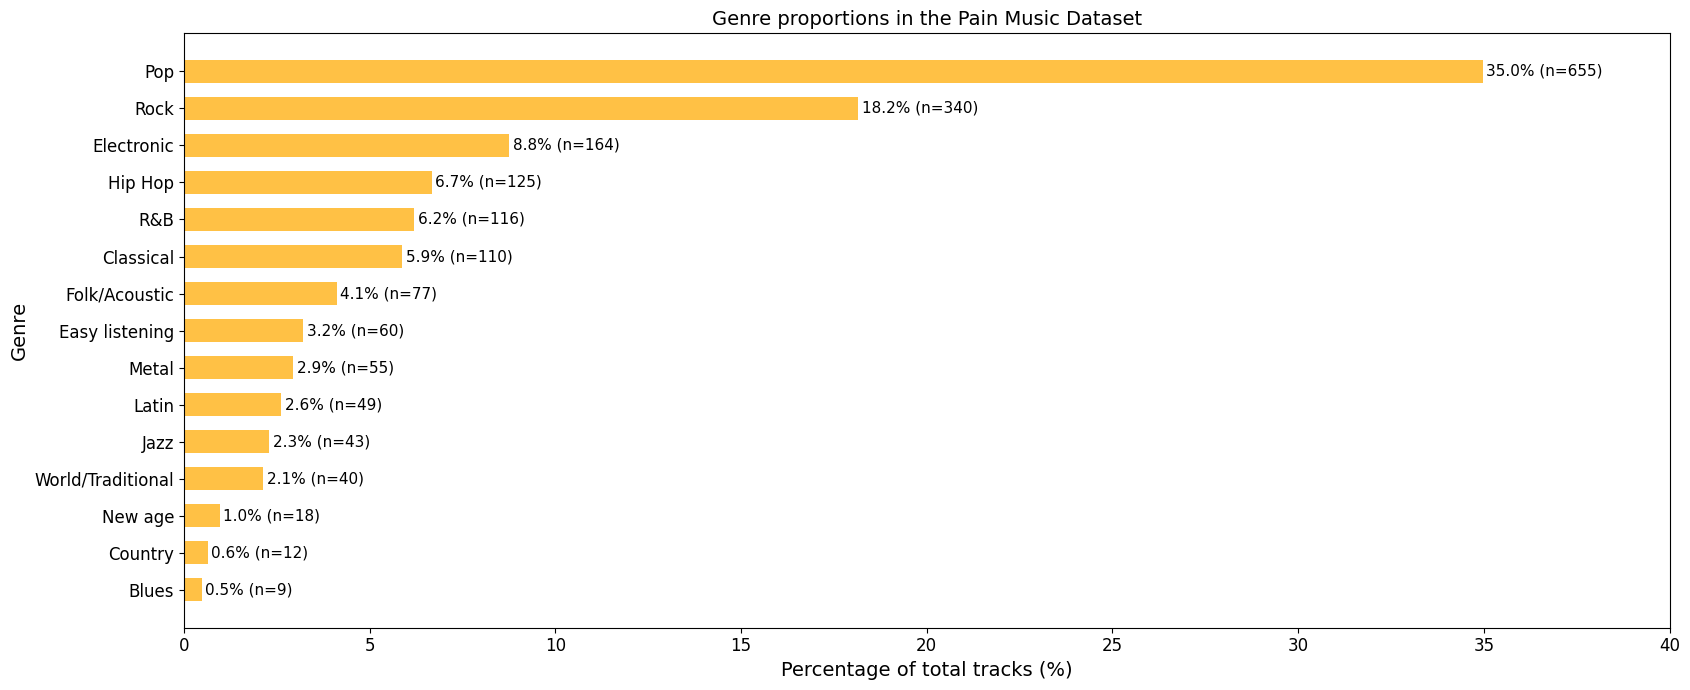

In [11]:
# Sort genres by proportion in descending order (highest to lowest)
overall_genre_proportions = overall_genre_proportions.sort_values(by='Proportion (%)', ascending=True)

# Plot overall genre proportions with horizontal bars
plt.figure(figsize=(17, 7))
bar_width = 0.6  # Adjusted for a clean academic look

# Plot horizontal bar chart
plt.barh(
    overall_genre_proportions['Genre'],
    overall_genre_proportions['Proportion (%)'],
    color="#FFC145",
    height=bar_width,
)

# Add labels with percentage and track count (n=)
for index, (percentage, track_count) in enumerate(zip(overall_genre_proportions['Proportion (%)'], overall_genre_proportions['Track count'])):
    plt.text(percentage + 0.1, index, f"{percentage:.1f}% (n={track_count})", va="center", fontsize=11)

# Add axis labels and title
plt.xlabel("Percentage of total tracks (%)", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Genre proportions in the Pain Music Dataset", fontsize=14)
plt.xticks(fontsize=12)
plt.xlim(0, 40)
plt.yticks(fontsize=12)

# Improve layout and save figure
plt.tight_layout()
plt.show()

In [12]:
# Function to calculate genre proportions and track counts
def calculate_genre_proportions(df, total_tracks):
    genre_counts = df['reducedGenre'].value_counts()
    genre_proportions = (genre_counts / total_tracks) * 100  # Convert to percentage

    # Create a DataFrame with results
    genre_proportion_df = pd.DataFrame({
        'Genre': genre_proportions.index,
        'Proportion (%)': genre_proportions.values,
        'Track count': genre_counts.values
    }).sort_values(by='Proportion (%)', ascending=False)

    return genre_proportion_df

# Subgroup analysis for MOSART and DOMINANT playlists
mosart_df = pmd_genres[pmd_genres['Playlist'].str.contains('MOSART', na=False)]
dominant_df = pmd_genres[pmd_genres['Playlist'].str.contains('DOMINANT', na=False)]

mosart_total_tracks = mosart_df.shape[0]
dominant_total_tracks = dominant_df.shape[0]

mosart_genre_proportions = calculate_genre_proportions(mosart_df, mosart_total_tracks)
dominant_genre_proportions = calculate_genre_proportions(dominant_df, dominant_total_tracks)

# Merge both datasets for comparison
merged_genre_proportions = mosart_genre_proportions.merge(
    dominant_genre_proportions, on="Genre", how="outer", suffixes=("_MOSART", "_DOMINANT")
).fillna(0)  # Fill missing values with 0 for genres that appear in only one subset

# Sort by highest combined proportion
merged_genre_proportions["Total_Proportion"] = merged_genre_proportions["Proportion (%)_MOSART"] + merged_genre_proportions["Proportion (%)_DOMINANT"]
merged_genre_proportions = merged_genre_proportions.sort_values(by="Total_Proportion", ascending=False)

# Drop the total proportion column (used only for sorting)
merged_genre_proportions = merged_genre_proportions.drop(columns=["Total_Proportion"])
merged_genre_proportions.reset_index(drop=True, inplace=True)
merged_genre_proportions

,Genre,Proportion (%)_MOSART,Track count_MOSART,Proportion (%)_DOMINANT,Track count_DOMINANT
0,Pop,35.235235,352,34.668192,303
1,Rock,19.019019,190,17.162471,150
2,Electronic,3.903904,39,14.302059,125
3,Hip Hop,4.804805,48,8.810069,77
4,R&B,8.308308,83,3.775744,33
5,Classical,5.805806,58,5.949657,52
6,Folk/Acoustic,3.803804,38,4.462243,39
7,Easy listening,3.003003,30,3.432494,30
8,Metal,3.603604,36,2.173913,19
9,Latin,3.703704,37,1.372998,12


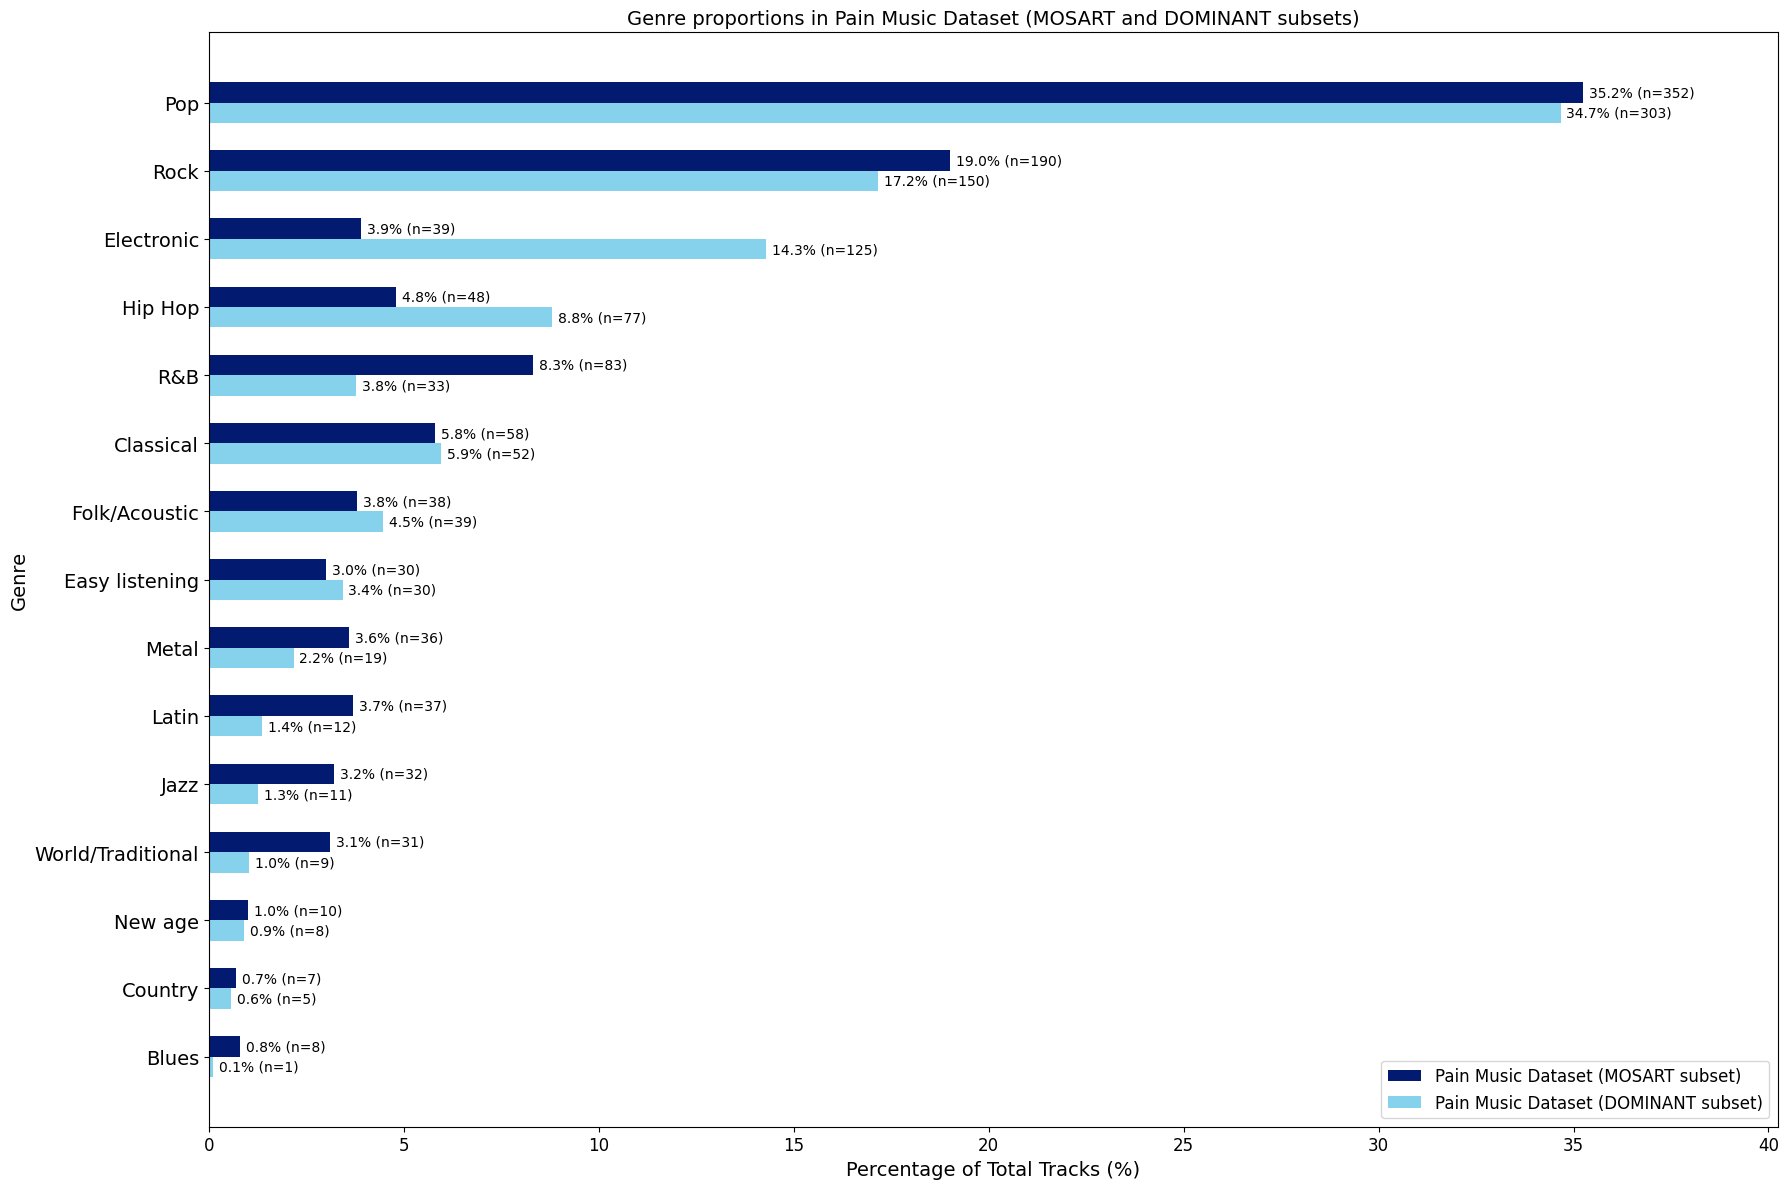

In [13]:
# Sort by highest combined proportion
merged_genre_proportions["Total_Proportion"] = merged_genre_proportions["Proportion (%)_MOSART"] + merged_genre_proportions["Proportion (%)_DOMINANT"]
merged_genre_proportions = merged_genre_proportions.sort_values(by="Total_Proportion", ascending=True)
merged_genre_proportions = merged_genre_proportions.drop(columns=["Total_Proportion"])

# Plot settings
plt.figure(figsize=(18, 12))
bar_width = 0.3
y_positions = range(len(merged_genre_proportions))

# Plot MOSART bars (Dark Blue)
plt.barh(
    [y + bar_width / 2 for y in y_positions],
    merged_genre_proportions["Proportion (%)_MOSART"],
    color="#021A70",
    label="Pain Music Dataset (MOSART subset)",
    height=bar_width,
)

# Plot DOMINANT bars (Light Blue)
plt.barh(
    [y - bar_width / 2 for y in y_positions],
    merged_genre_proportions["Proportion (%)_DOMINANT"],
    color="#86D2EC",
    label="Pain Music Dataset (DOMINANT subset)",
    height=bar_width,
)

# Add labels with percentage & track count (n=)
for i, (mosart_percent, dominant_percent, mosart_count, dominant_count) in enumerate(
    zip(
        merged_genre_proportions["Proportion (%)_MOSART"], 
        merged_genre_proportions["Proportion (%)_DOMINANT"], 
        merged_genre_proportions["Track count_MOSART"], 
        merged_genre_proportions["Track count_DOMINANT"]
    )
):
    plt.text(mosart_percent + 0.15, i + bar_width / 2, f"{mosart_percent:.1f}% (n={mosart_count})", va="center", fontsize=10)
    plt.text(dominant_percent + 0.15, i - bar_width / 2, f"{dominant_percent:.1f}% (n={dominant_count})", va="center", fontsize=10)

# Formatting
plt.xlabel("Percentage of Total Tracks (%)", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Genre proportions in Pain Music Dataset (MOSART and DOMINANT subsets)", fontsize=14)
plt.yticks(ticks=y_positions, labels=merged_genre_proportions["Genre"], fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc="lower right", fontsize="large")
plt.xlim(0, max(merged_genre_proportions["Proportion (%)_MOSART"].max(), merged_genre_proportions["Proportion (%)_DOMINANT"].max()) + 5)

# Improve layout and show plot
plt.tight_layout()
plt.show()

In [14]:
# Merge overall proportions with MOSART and DOMINANT proportions
merged_proportions = overall_genre_proportions.merge(
    mosart_genre_proportions, on="Genre", how="outer", suffixes=("_overall", "_MOSART")
).merge(
    dominant_genre_proportions, on="Genre", how="outer", suffixes=("", "_DOMINANT")
).fillna(0)  # Fill missing values with 0 for genres that appear in only one subset

# Rename columns properly
merged_proportions.rename(columns={
    "Proportion (%)_overall": "Proportion (%)_PMD",
    "Track count_overall": "Track count_PMD",
    "Proportion (%)": "Proportion (%)_DOMINANT",
    "Track count": "Track count_DOMINANT"
}, inplace=True)

# Sort by highest overall proportion
merged_proportions["Total_Proportion"] = merged_proportions["Proportion (%)_PMD"]
merged_proportions = merged_proportions.sort_values(by="Total_Proportion", ascending=False).drop(columns=["Total_Proportion"])
merged_proportions.reset_index(drop=True, inplace=True)
merged_proportions

,Genre,Proportion (%)_PMD,Track count_PMD,Proportion (%)_MOSART,Track count_MOSART,Proportion (%)_DOMINANT,Track count_DOMINANT
0,Pop,34.970635,655,35.235235,352,34.668192,303
1,Rock,18.152696,340,19.019019,190,17.162471,150
2,Electronic,8.756006,164,3.903904,39,14.302059,125
3,Hip Hop,6.673785,125,4.804805,48,8.810069,77
4,R&B,6.193273,116,8.308308,83,3.775744,33
5,Classical,5.872931,110,5.805806,58,5.949657,52
6,Folk/Acoustic,4.111052,77,3.803804,38,4.462243,39
7,Easy listening,3.203417,60,3.003003,30,3.432494,30
8,Metal,2.936466,55,3.603604,36,2.173913,19
9,Latin,2.616124,49,3.703704,37,1.372998,12


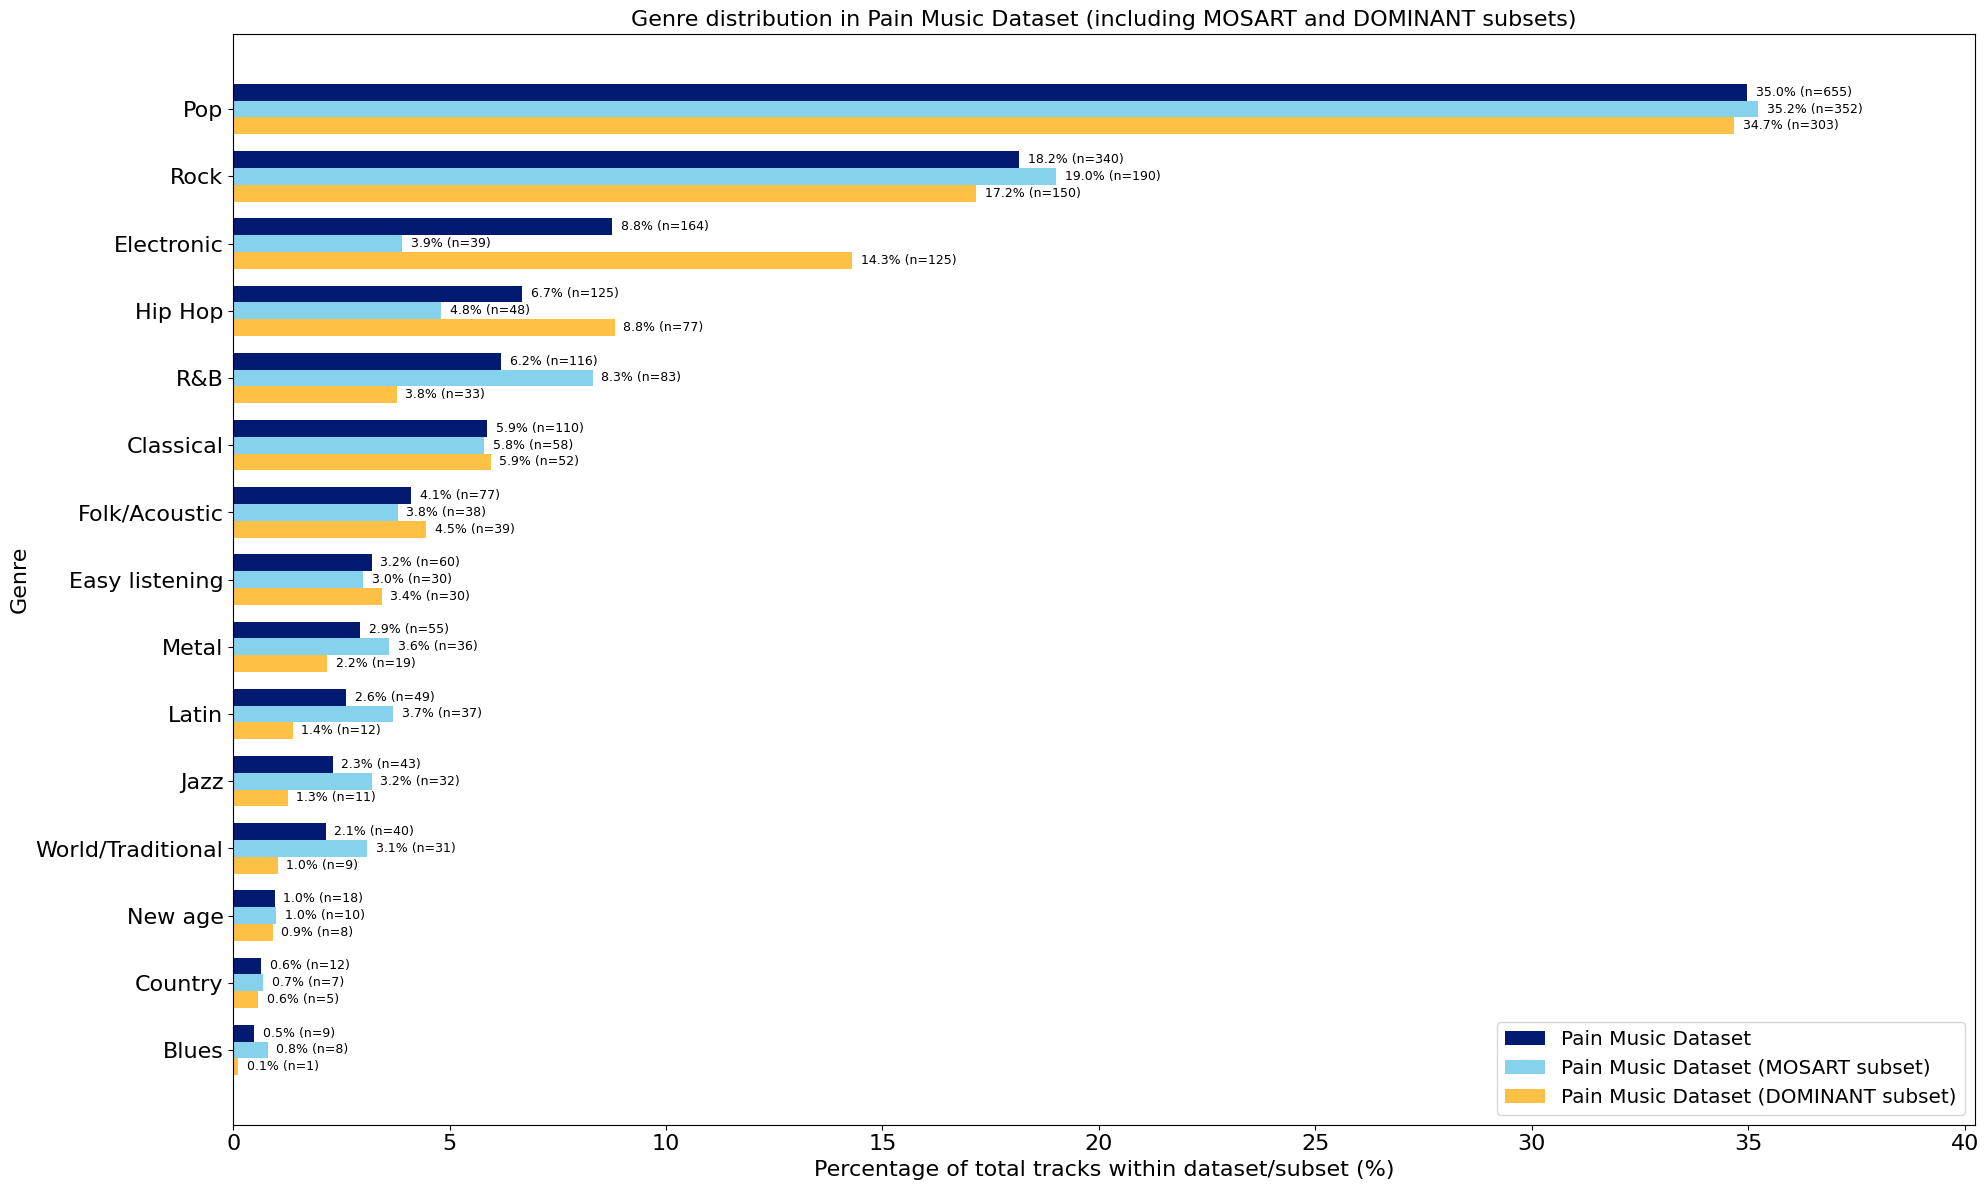

In [ ]:
# Sort by highest combined proportion
merged_proportions["Total_Proportion"] = (
    merged_proportions["Proportion (%)_PMD"] +
    merged_proportions["Proportion (%)_MOSART"] +
    merged_proportions["Proportion (%)_DOMINANT"]
)
merged_proportions = merged_proportions.sort_values(by="Total_Proportion", ascending=True).drop(columns=["Total_Proportion"])

# ** Define custom colors for each category **
color_pmd = "#021A70"  #86D2EC
color_mosart = "#86D2EC" #214E34 #122C34
color_dominant = "#FFC145" #E4572E #757761

# Plot settings
plt.figure(figsize=(20, 12))
bar_width = 0.25
y_positions = range(len(merged_proportions))

# Plot Overall PMD bars
plt.barh(
    [y + bar_width for y in y_positions],
    merged_proportions["Proportion (%)_PMD"],
    color=color_pmd,
    label="Pain Music Dataset",
    height=bar_width,
)

# Plot MOSART bars
plt.barh(
    y_positions,
    merged_proportions["Proportion (%)_MOSART"],
    color=color_mosart,
    label="Pain Music Dataset (MOSART subset)",
    height=bar_width,
)

# Plot DOMINANT bars
plt.barh(
    [y - bar_width for y in y_positions],
    merged_proportions["Proportion (%)_DOMINANT"],
    color=color_dominant,
    label="Pain Music Dataset (DOMINANT subset)",
    height=bar_width,
)

# Add labels with percentage & track count (n=)
for i, (pmd_percent, mosart_percent, dominant_percent, pmd_count, mosart_count, dominant_count) in enumerate(
    zip(
        merged_proportions["Proportion (%)_PMD"],
        merged_proportions["Proportion (%)_MOSART"],
        merged_proportions["Proportion (%)_DOMINANT"],
        merged_proportions["Track count_PMD"],
        merged_proportions["Track count_MOSART"],
        merged_proportions["Track count_DOMINANT"]
    )
):
    plt.text(pmd_percent + 0.2, i + bar_width, f"{pmd_percent:.1f}% (n={pmd_count})", va="center", fontsize=9)
    plt.text(mosart_percent + 0.2, i, f"{mosart_percent:.1f}% (n={mosart_count})", va="center", fontsize=9)
    plt.text(dominant_percent + 0.2, i - bar_width, f"{dominant_percent:.1f}% (n={dominant_count})", va="center", fontsize=9)

# Formatting
plt.xlabel("Percentage of total tracks within dataset/subset (%)", fontsize=16)
plt.ylabel("Genre", fontsize=16)
plt.title("Genre distribution in Pain Music Dataset (including MOSART and DOMINANT subsets)", fontsize=16)
plt.yticks(ticks=y_positions, labels=merged_proportions["Genre"], fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc="lower right", fontsize="x-large")
plt.xlim(0, max(merged_proportions["Proportion (%)_PMD"].max(), merged_proportions["Proportion (%)_MOSART"].max(), merged_proportions["Proportion (%)_DOMINANT"].max()) + 5)

# Improve layout and show plot
plt.tight_layout()
plt.show()